In [ ]:
from google.colab import files

uploaded = files.upload()

Saving iris.csv to iris (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load dataset
file_path = 'iris.csv'
df = pd.read_csv(file_path, sep=';', decimal=',')

In [ ]:
# Cek struktur dataset
df.head()

,a1,a2,a3,a4,id,label
0,5.1,3.5,1.4,0.2,id_1,Iris-setosa
1,4.9,3.0,1.4,0.2,id_2,Iris-setosa
2,4.7,3.2,1.3,0.2,id_3,Iris-setosa
3,4.6,3.1,1.5,0.2,id_4,Iris-setosa
4,5.0,3.6,1.4,0.2,id_5,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a1      150 non-null    object
 1   a2      150 non-null    object
 2   a3      150 non-null    object
 3   a4      150 non-null    object
 4   id      150 non-null    object
 5   label   150 non-null    object
dtypes: object(6)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,a1,a2,a3,a4,id,label
count,150,150,150,150,150,150
unique,35,23,43,22,150,3
top,5.0,3.0,1.5,0.2,id_1,Iris-setosa
freq,10,26,14,28,1,50


In [ ]:
df['label'].value_counts()

,count
label,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
# Convert numerical columns to float
df[['a1', 'a2', 'a3', 'a4']] = df[['a1', 'a2', 'a3', 'a4']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      150 non-null    float64
 1   a2      150 non-null    float64
 2   a3      150 non-null    float64
 3   a4      150 non-null    float64
 4   id      150 non-null    object 
 5   label   150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.2+ KB


In [ ]:
# Hapus kolom 'id'
df = df.drop(columns='id')
df

,a1,a2,a3,a4,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Pisahkan fitur dan target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
# Split data menjadi train (80%) dan test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inisialisasi dan latih model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Prediksi pada data uji
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

Accuracy: 100.00%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
# 1️⃣ Evaluasi dengan Cross-Validation
scores = cross_val_score(rf_model, X, y, cv=5)  # 5-fold cross-validation
print(f'Cross-Validation Accuracy: {scores.mean() * 100:.2f}% ± {scores.std() * 100:.2f}%')

Cross-Validation Accuracy: 96.67% ± 2.11%


Cross-Validation vs. Single Train-Test Split:

* Cross-validation menghasilkan rata-rata akurasi 96.67% ± 2.11%, yang lebih realistis untuk mengukur performa model.
* Single train-test split sebelumnya mendapatkan 100% akurasi, tetapi ini bisa terjadi karena kebetulan pembagian data uji mudah diklasifikasikan oleh model.
* Cross-validation lebih terpercaya karena mempertimbangkan berbagai kemungkinan pembagian data.


In [ ]:
# 2Cek Feature Importance
feature_importances = rf_model.feature_importances_

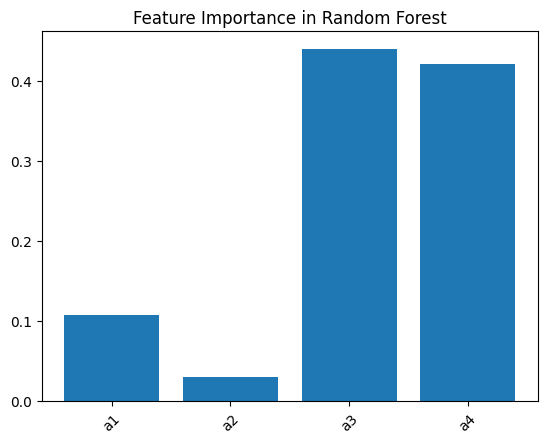

In [ ]:
# Visualisasi Feature Importance
plt.bar(X.columns, feature_importances)
plt.xticks(rotation=45)
plt.title("Feature Importance in Random Forest")
plt.show()

Feature Importance:

* Fitur a3 dan a4 memiliki pengaruh paling besar dalam klasifikasi, sementara a2 hampir tidak berkontribusi.
* Ini bisa digunakan untuk feature selection, jika ingin menyederhanakan model tanpa kehilangan akurasi.
